---
This example comes from https://www.datacamp.com/tutorial/wordcloud-python and provides an example of making a word-cloud from a local file. In this example, the data are a wine review dataset from Kaggle (https://www.kaggle.com/datasets/zynicide/wine-reviews/). This collection is a great dataset for learning with no missing values (which will take time to handle) and a lot of text (wine reviews), categorical, and numerical data.
## What is a Word Cloud?

Many times you might have seen a cloud filled with lots of words in different sizes, which represent the frequency or the importance of each word. This is called a Tag Cloud or word cloud. For this tutorial, you will learn how to create a word cloud in Python and customize it as you see fit. This tool will be handy for exploring text data and making your report more lively.

In this tutorial, we will use a wine review dataset from the Wine Enthusiast website to learn:

* How to create a basic word cloud from one to several text documents
* Adjust the color, size, and number of text inside your word cloud
* Mask your word cloud into any shape of your choice
* Mask your word cloud into any color pattern of your choice

### When to use a Word Cloud
It's important to remember that while word clouds are useful for visualizing common words in a text or data set, they're usually only useful as a high-level overview of themes. They're similar to bar blots but are often more visually appealing (albeit at times harder to interpret). Word clouds can be particularly helpful when you want to:

* Quickly identify the most important themes or topics in a large body of text
* Understand the overall sentiment or tone of a piece of writing
* Explore patterns or trends in data that contain textual information
* Communicate the key ideas or concepts in a visually engaging way

However, it's important to keep in mind that word clouds don't provide any context or deeper understanding of the words and phrases being used. Therefore, they should be used in conjunction with other methods for analyzing and interpreting text data.


In [3]:
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

### Read data set (CSV)

In [4]:
df = pd.read_csv('data/winemag-data-130k-v2.csv', index_col=0)

# Look at first 5 rows of the dataset
df.head()

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


In [5]:
# Print some details
print("There are {} observations and {} features in this dataset. \n".format(df.shape[0],df.shape[1]))

print("There are {} types of wine in this dataset such as {}... \n".format(len(df.variety.unique()),
                                                                ", ".join(df.variety.unique()[0:5])))

print("There are {} countries producing wine in this dataset such as {}... \n".format(len(df.country.unique()),
                                                                  ", ".join(df.country.unique()[0:5])))
df[["country", "description","points"]].head()

There are 129971 observations and 13 features in this dataset. 

There are 708 types of wine in this dataset such as White Blend, Portuguese Red, Pinot Gris, Riesling, Pinot Noir... 

There are 44 countries producing wine in this dataset such as Italy, Portugal, US, Spain, France... 



,country,description,points
0,Italy,"Aromas include tropical fruit, broom, brimston...",87
1,Portugal,"This is ripe and fruity, a wine that is smooth...",87
2,US,"Tart and snappy, the flavors of lime flesh and...",87
3,US,"Pineapple rind, lemon pith and orange blossom ...",87
4,US,"Much like the regular bottling from 2012, this...",87


### Make some comparisons

In [6]:
# Groupby by country
country = df.groupby("country")

# Summary statistic of all countries
country.describe().head()

points                                                 \
                         count       mean       std   min    25%   50%    75%   
country                                                                         
Argentina               3800.0  86.710263  3.179627  80.0  84.00  87.0  89.00   
Armenia                    2.0  87.500000  0.707107  87.0  87.25  87.5  87.75   
Australia               2329.0  88.580507  2.989900  80.0  87.00  89.0  91.00   
Austria                 3345.0  90.101345  2.499799  82.0  88.00  90.0  92.00   
Bosnia and Herzegovina     2.0  86.500000  2.121320  85.0  85.75  86.5  87.25   

                                price                                     \
                          max   count       mean        std   min    25%   
country                                                                    
Argentina                97.0  3756.0  24.510117  23.430122   4.0  12.00   
Armenia                  88.0     2.0  14.500000   0.707107  14.0  14.25   
Australia               100.0  2294.0  35.437663  49.049458   5.0  15.00   
Austria                  98.0  2799.0  30.762772  27.224797   7.0  18.00   
Bosnia and Herzegovina   88.0     2.0  12.500000   0.707107  12.0  12.25   

                                             
                         50%    75%     max  
country                                      
Argentina               17.0  25.00   230.0  
Armenia                 14.5  14.75    15.0  
Australia               21.0  38.00   850.0  
Austria                 25.0  36.50  1100.0  
Bosnia and Herzegovina  12.5  12.75    13.0

In [7]:
# Select the top 5 highest average points among all 44 countries:
country.mean(numeric_only=True).sort_values(by="points",ascending=False).head()

,points,price
country,,
England,91.581081,51.681159
India,90.222222,13.333333
Austria,90.101345,30.762772
Germany,89.851732,42.257547
Canada,89.369650,35.712598


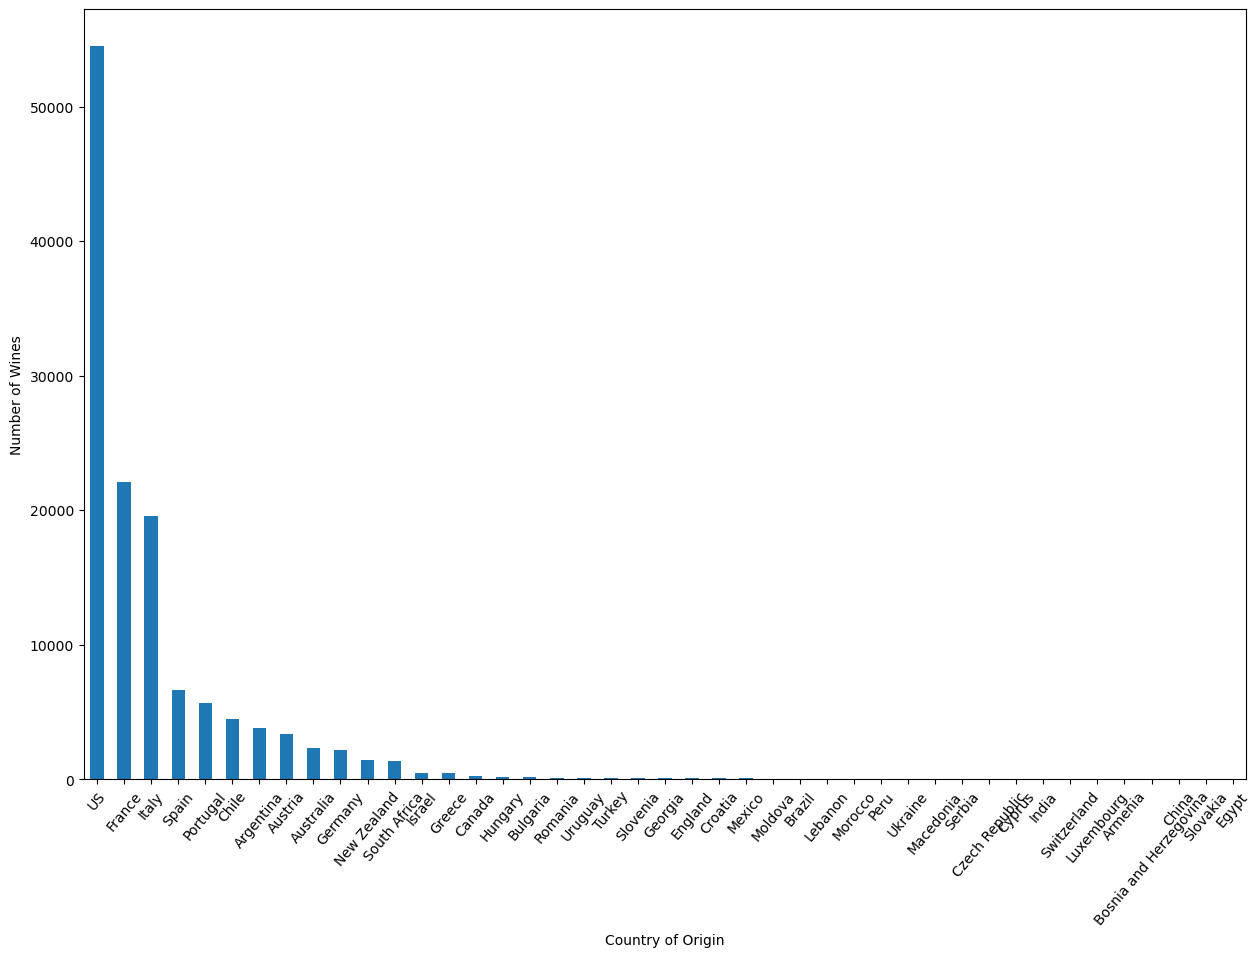

In [8]:
# Make a plot
plt.figure(figsize=(15,10))
country.size().sort_values(ascending=False).plot.bar()
plt.xticks(rotation=50)
plt.xlabel("Country of Origin")
plt.ylabel("Number of Wines")
plt.show()

Among 44 countries producing wine, the US has more than 50,000 types in the wine review dataset, twice as much as the next one in the rank, France - the country famous for its wine. Italy also produces a lot of quality wine, having nearly 20,000 wines open to review.
Let's examine the data further

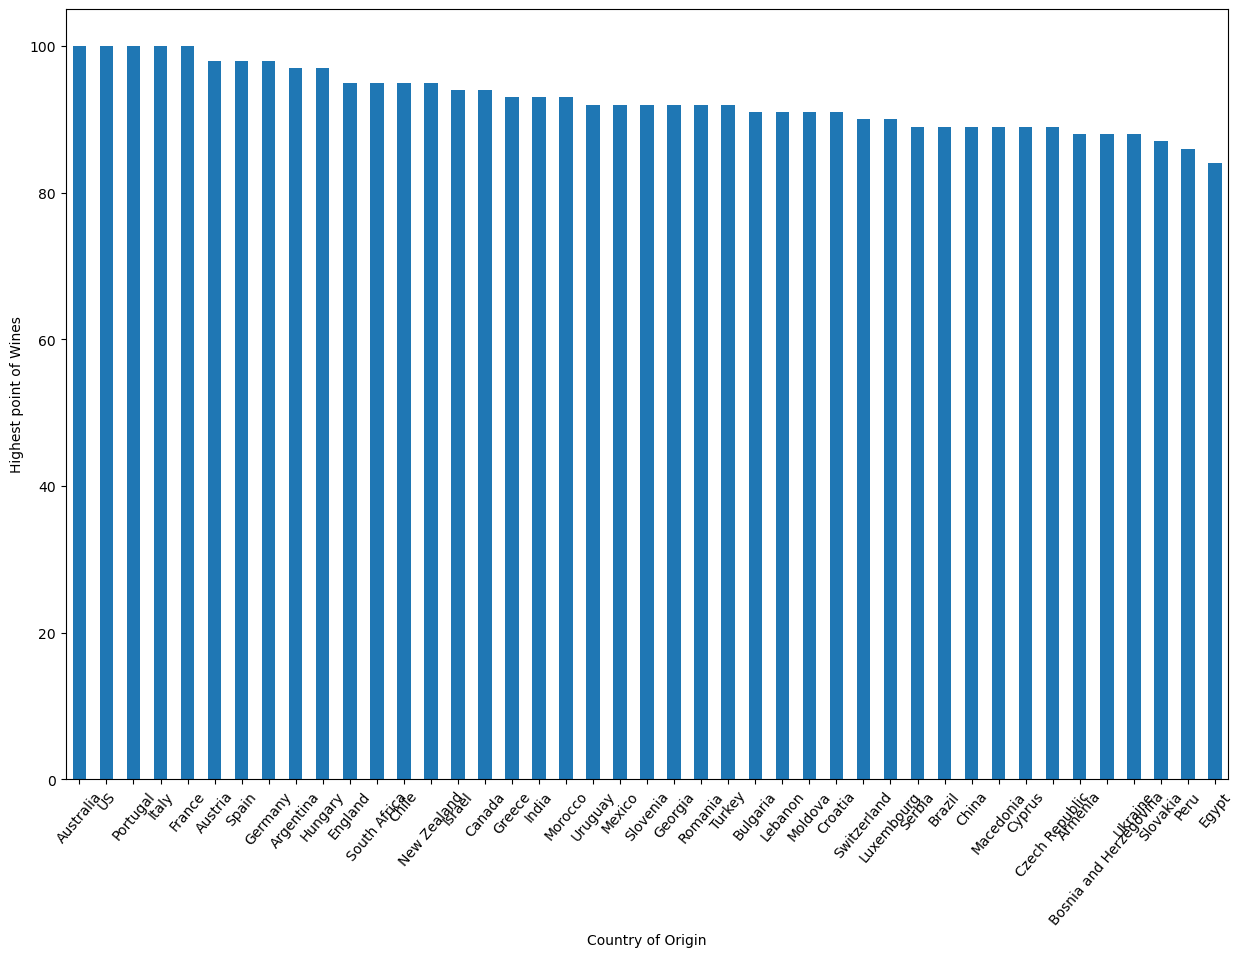

In [9]:
plt.figure(figsize=(15,10))
country.max(numeric_only=True).sort_values(by="points",ascending=False)["points"].plot.bar()
plt.xticks(rotation=50)
plt.xlabel("Country of Origin")
plt.ylabel("Highest point of Wines")
plt.show()

Australia, US, Portugal, Italy, and France all have 100 points wines. If you notice, Portugal ranks 5th and Australia ranks 9th in the number of wines produces in the dataset, and both countries have less than 8000 types of wine.  That's a little bit of data exploration to get to know the dataset that you are using today. Now we can try make use of a word cloud.


### Usage
WordCloud(font_path=None, width=400, height=200, margin=2, ranks_only=None, prefer_horizontal=0.9, mask=None, scale=1, color_func=None, max_words=200, min_font_size=4, stopwords=None, random_state=None, background_color='black', max_font_size=None, font_step=1, mode='RGB', relative_scaling=0.5, regexp=None, collocations=True, colormap=None, normalize_plurals=True, contour_width=0, contour_color='black')

#### Parameters
__font_path__ : string <br>
Font path to the font that will be used (OTF or TTF). Defaults to DroidSansMono path on a Linux machine. If you are on another OS or don't have this font; you need to adjust this path.

__width__ : int (default=400) <br>
Width of the canvas.

__height__ : int (default=200) <br>
Height of the canvas.

__prefer_horizontal__ : float (default=0.90) <br>
The ratio of times to try horizontal fitting as opposed to vertical. If prefer_horizontal < 1, the algorithm will try rotating the word if it doesn't fit. (There is currently no built-in way to get only vertical words.)

__mask__ : nd-array or None (default=None) <br>
If not None, gives a binary mask on where to draw words. If mask is not None, width and height will be ignored, and the shape of mask will be used instead. All white (#FF or #FFFFFF) entries will be considered "masked out" while other entries will be free to draw on. [This changed in the most recent version!]

__contour_width__: float (default=0) <br>
If mask is not None and contour_width > 0, draw the mask contour.

__contour_color__: color value (default="black") <br>
Mask contour color.

__scale__ : float (default=1) <br>
Scaling between computation and drawing. For large word-cloud images, using scale instead of larger canvas size is significantly faster, but might lead to a coarser fit for the words.

__min_font_size__ : int (default=4) <br>
Smallest font size to use. Will stop when there is no more room in this size.

__font_step__ : int (default=1) <br>
Step size for the font. font_step > 1 might speed up computation but give a worse fit.

__max_words__ : number (default=200) <br>
The maximum number of words.

__stopwords__ : set of strings or None <br>
The words that will be eliminated. If None, the build-in STOPWORDS list will be used.

__background_color__ : color value (default="black") <br>
Background color for the word cloud image.

__max_font_size__ : int or None (default=None) <br>
Maximum font size for the largest word. If None, the height of the image is used.

__mode__ : string (default="RGB") <br>
Transparent background will be generated when mode is "RGBA" and background_color is None.

__relative_scaling__ : float (default=.5) <br>
Importance of relative word frequencies for font-size.  With relative_scaling=0, only word-ranks are considered.  With relative_scaling=1, a word that is twice as frequent will have twice the size.  If you want to consider the word frequencies and not only their rank, relative_scaling around .5 often looks good.

__color_func__ : callable, default=None <br>
Callable with parameters word, font_size, position, orientation, font_path, random_state that returns a PIL color for each word.  Overwrites "colormap".  See colormap for specifying a matplotlib colormap instead.

__regexp__ : string or None (optional) <br>
Regular expression to split the input text into tokens in process_text.  If None is specified, ``r"\w[\w']+"`` is used.

__collocations__ : bool, default=True <br>
Whether to include collocations (bigrams) of two words.

__colormap__ : string or matplotlib colormap, default="viridis" <br>
Matplotlib colormap to randomly draw colors from for each word.  Ignored if "color_func" is specified.

__normalize_plurals__ : bool, default=True <br>
Whether to remove trailing 's' from words. If True and a word appears with and without a trailing 's', the one with trailing 's' is removed and its counts are added to the version without trailing 's' -- unless the word ends with 'ss'.

#### Attributes

__words__ : dict of string to float <br>
Word tokens with associated frequency.

__layout__ : list of tuples (string, int, (int, int), int, color)) <br>
Encodes the fitted word cloud. Encodes for each word the string, font size, position, orientation, and color.

#### Notes

Larger canvases will make the code significantly slower. If you need a large word cloud, try a lower canvas size, and set the scale parameter.  The algorithm might give more weight to the ranking of the words than their actual frequencies, depending on __max_font_size__ and the scaling heuristic.


You can see that the only required argument for a WordCloud object is the text, while all others are optional.

So let's start with a simple example: using the first observation description as the input for the word cloud. The three steps are:

1. Extract the review (text document)
2. Create and generate a wordcloud image
3. Display the cloud using matplotlib


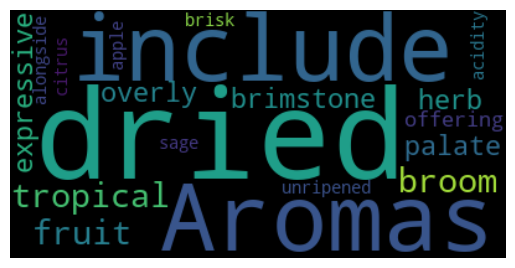

In [11]:
# Start with one review
text = df.description[0]

# Create and generate a word cloud image:
wordcloud = WordCloud().generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off");

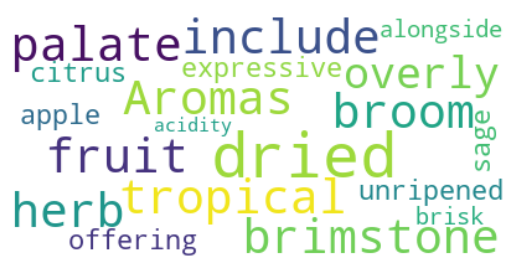

In [12]:
# Now, change some optional arguments of the word cloud like max_font_size, max_word, and background_color.

# lower max_font_size, change the maximum number of word and lighten the background:
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off");

In [13]:
# Save the image in the img folder:
wordcloud.to_file("./images/first_review.png")

There are 31661073 words in the combination of all review.


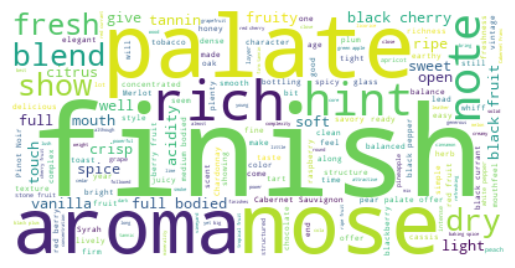

In [14]:
# Now combine all wine reviews into one big text and create a big fat cloud to see which 
# characteristics are most common in these wines.

text = " ".join(review for review in df.description)
print ("There are {} words in the combination of all review.".format(len(text)))

# Create stopword list:
stopwords = set(STOPWORDS)
stopwords.update(["drink", "now", "wine", "flavor", "flavors"])

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off");

### Put word cloud into an image

In order to create a shape for your word cloud, first, you need to find a PNG file to become the mask. Below is a nice one that is available on the internet.

Not all mask images have the same format resulting in different outcomes, hence making the WordCloud function not working properly. To make sure that your mask works, let's take a look at it in the numpy array form.

In [16]:
wine_mask = np.array(Image.open("./images/wine_mask.png"))
wine_mask

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

The way the masking functions works is that it requires all white part of the mask should be 255 not 0 (integer type). This value represents the "intensity" of the pixel. Values of 255 are pure white, whereas values of 1 are black. Here, you can use the provided function below to transform your mask if your mask has the same format as above. Notice if you have a mask that the background is not 0, but 1 or 2, adjust the function to match your mask.

In [17]:
# First use the transform_format() function to swap number 0 to 255.

def transform_format(val):
    if val == 0:
        return 255
    else:
        return val

# Transform your mask into a new one that will work with the function:
transformed_wine_mask = np.ndarray((wine_mask.shape[0],wine_mask.shape[1]), np.int32)

for i in range(len(wine_mask)):
    transformed_wine_mask[i] = list(map(transform_format, wine_mask[i]))

# Check the expected result of your mask
transformed_wine_mask

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=int32)

With the right mask, you can start making the word cloud with your selected shape. Notice in the WordCloud function there is a mask argument that takes in the transformed mask that you created above. The contour_width and contour_color are, as their name suggests, arguments to adjust the outline characteristics of the cloud. The wine bottle you have here is a red wine bottle, so firebrick seems like a good choice for contour color. For more choices of color, you can take a look at this color code table.

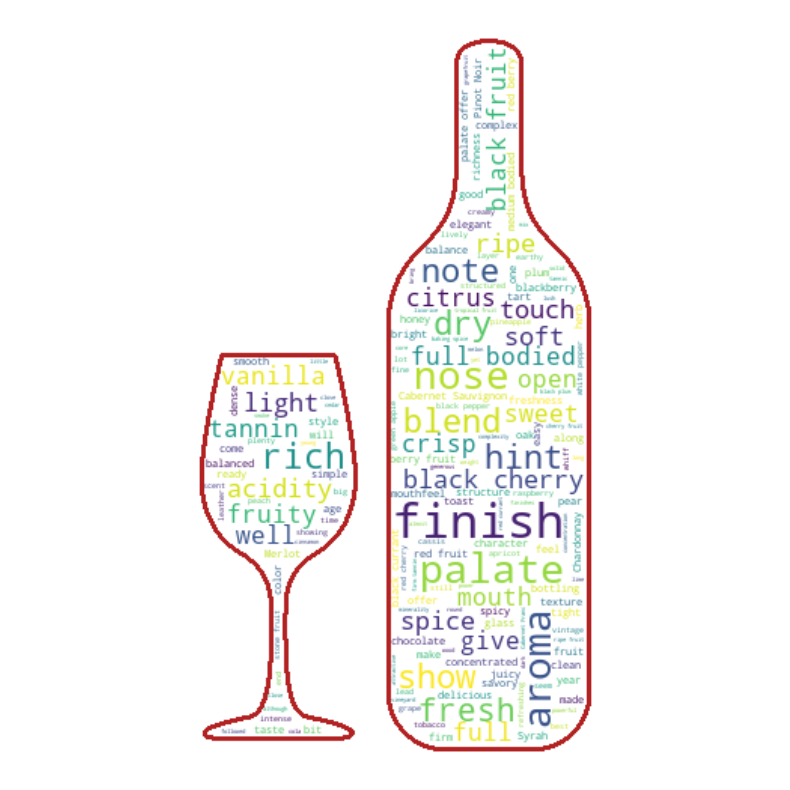

In [18]:
# Create a word cloud image
wc = WordCloud(background_color="white", max_words=1000, mask=transformed_wine_mask,
               stopwords=stopwords, contour_width=3, contour_color='firebrick')

# Generate a wordcloud
wc.generate(text)

# store to file
wc.to_file("wine.png")

# show
plt.figure(figsize=[20,10])
plt.imshow(wc, interpolation='bilinear')
plt.axis("off");

Voila! You created a word cloud in the shape of a wine bottle! It seems like wine descriptions most often mention black cherry, fruit flavors, and full-bodied characteristics of the wine. Now let's take a closer look at the reviews for each country and plot the word cloud using each country's flag. Below is an example that you will create soon:
usa flag
Creating a Word Cloud Following a Color Pattern

You can combine all the reviews of the five countries that have the most wines. To find those countries, you can either look at the plot country vs number of wines above or use the group that you got above to find the number of observations for each country (each group) and sort_values() with argument ascending=False to sort descending.

In [19]:
# Choose top five countries
country.size().sort_values(ascending=False).head(5)

country
US          54504
France      22093
Italy       19540
Spain        6645
Portugal     5691
dtype: int64

In [20]:
# Concatenate all of the reviews using the " ".join(list) syntax, which joins all elements in a list, 
# separating them by whitespace.

usa = " ".join(review for review in df[df["country"]=="US"].description)
fra = " ".join(review for review in df[df["country"]=="France"].description)
ita = " ".join(review for review in df[df["country"]=="Italy"].description)
spa = " ".join(review for review in df[df["country"]=="Spain"].description)
por = " ".join(review for review in df[df["country"]=="Portugal"].description)

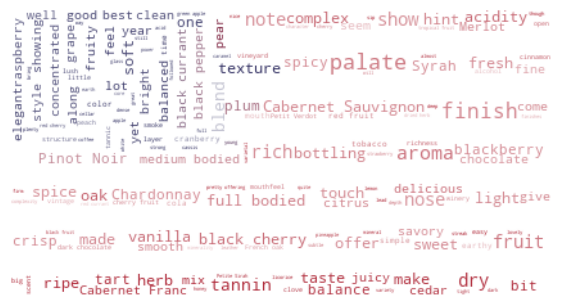

In [21]:
# Generate a word cloud image
mask = np.array(Image.open('./images/us.png').convert('RGB'))
wordcloud_usa = WordCloud(stopwords=stopwords, background_color="white", mode="RGBA", max_words=1000, mask=mask).generate(usa)

# create coloring from image
image_colors = ImageColorGenerator(mask)
plt.figure(figsize=[7,7])
plt.imshow(wordcloud_usa.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis("off")

# store to file
plt.savefig("./images/us_wine.png", format="png")

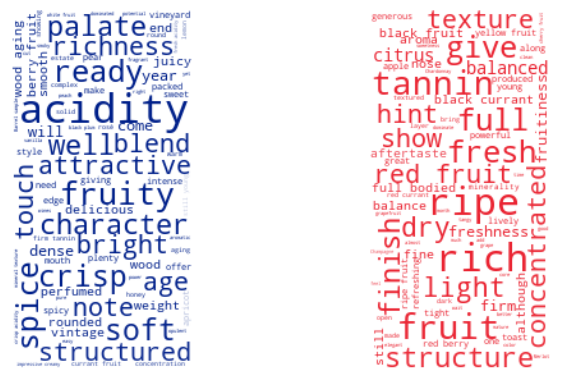

In [22]:
# Generate a word cloud image
mask = np.array(Image.open('images/france.png').convert('RGB'))
wordcloud_fra = WordCloud(stopwords=stopwords, background_color="white", mode="RGBA", max_words=1000, mask=mask).generate(fra)

# create coloring from image
image_colors = ImageColorGenerator(mask)
plt.figure(figsize=[7,7])
plt.imshow(wordcloud_fra.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis("off")

# store to file
plt.savefig("images/fra_wine.png", format="png")

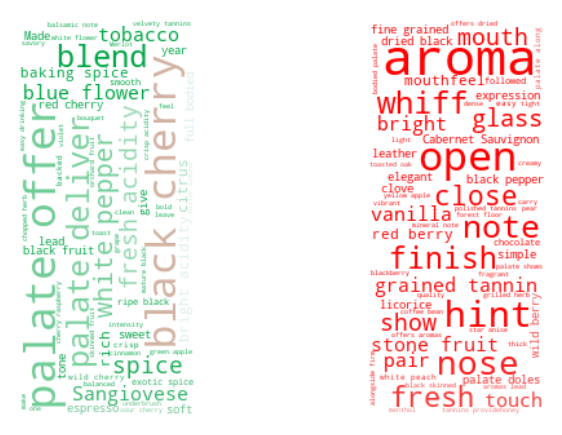

In [23]:
mask = np.array(Image.open("images/italy.png").convert('RGB'))
wordcloud_ita = WordCloud(stopwords=stopwords, background_color="white", max_words=1000, mask=mask).generate(ita)

# create coloring from image
image_colors = ImageColorGenerator(mask)
plt.figure(figsize=[7,7])
plt.imshow(wordcloud_ita.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis("off")

# store to file
plt.savefig("images/ita_wine.png", format="png")

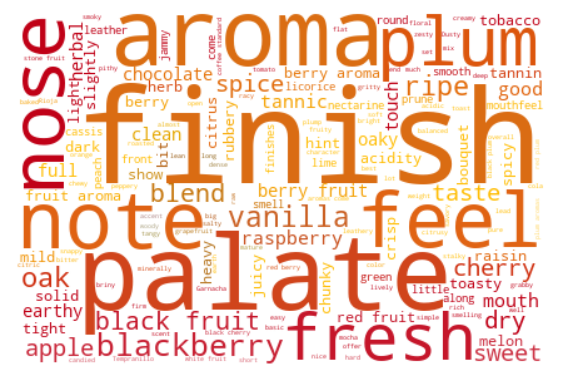

In [24]:
# Generate a word cloud image
mask = np.array(Image.open("images/spain.png").convert('RGB'))
wordcloud_spa = WordCloud(stopwords=stopwords, background_color="white", max_words=1000, mask=mask).generate(spa)

# create coloring from image
image_colors = ImageColorGenerator(mask)
plt.figure(figsize=[7,7])
plt.imshow(wordcloud_spa.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis("off")

# store to file
plt.savefig("images/spa_wine.png", format="png")

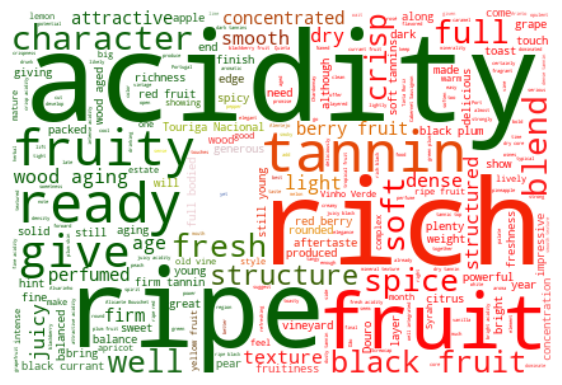

In [25]:
# Generate a word cloud image
mask = np.array(Image.open("./images/portugal.png").convert('RGB'))
wordcloud_por = WordCloud(stopwords=stopwords, background_color="white", max_words=1000, mask=mask).generate(por)

# create coloring from image
image_colors = ImageColorGenerator(mask)
plt.figure(figsize=[7,7])
plt.imshow(wordcloud_por.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis("off")

# store to file
plt.savefig("images/por_wine.png", format="png")

### How to Interpret Word Clouds

So, we've now seen several word cloud examples and how to create them in Python. However, it's worth exploring how to interpret these data visualizations. Generally, the size of each word in the cloud represents its frequency or importance in the text. Typically, the more frequently a word appears in the text, the larger it will appear in the word cloud.

There are several things to bear in mind when interpreting word clouds: 

* Pay attention to the size of the words: As mentioned, the size of each word in the cloud corresponds to its frequency or importance in the text. Therefore, larger words are generally more significant in the overall message of the text.
* Look for patterns: Are there any groups of words that appear together frequently? This can indicate a theme or topic that is important in the text.
* Consider the context: Remember that the word cloud only represents the words that appear in the text, and doesn't provide any information about their meaning or how they are being used. Therefore, it's important to think about the context of the text and the specific meanings of the words being used.
* Be wary of outliers: Sometimes, a word may appear very large in the word cloud simply because it appears frequently, even if it's not particularly meaningful or relevant to the overall message of the text. Keep an eye out for such outliers and try to focus on the words and patterns that are most significant.

Overall, a word cloud can be a useful tool for quickly visualizing the key themes and ideas in a text. However, it's important to keep in mind that it is just one tool among many for analyzing text data, and should be used in conjunction with other methods for deeper analysis and understanding.
Congratulations!
